# Hierarchical Clustering

### Import

In [105]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [106]:
df = pd.read_csv("iris.csv")

In [107]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### EDA - Exploratory Data Analysis and Visualization

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Figure size 960x480 with 0 Axes>

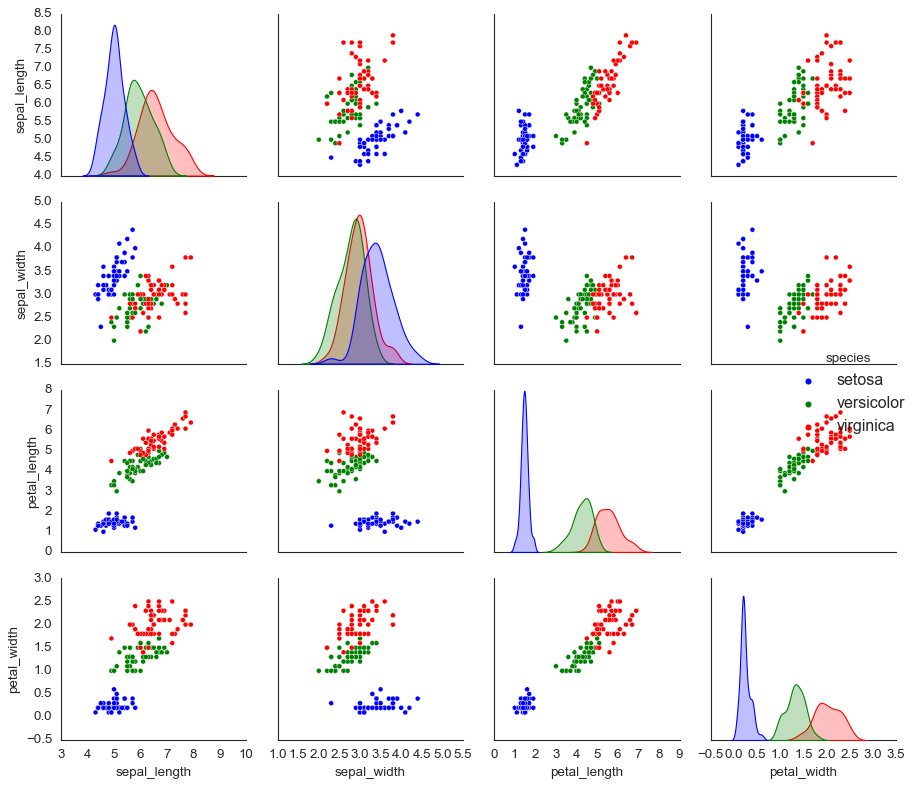

In [111]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue = "species")
plt.tight_layout();

In [112]:
X = df.drop("species", axis=1)

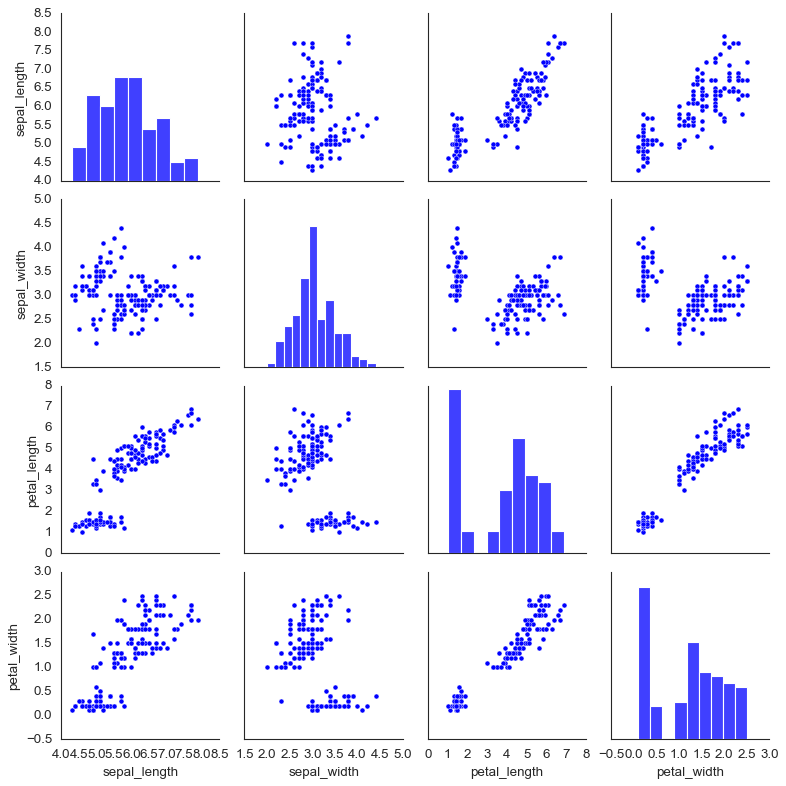

In [113]:
sns.pairplot(X);

### Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [114]:
#!pip install pyclustertend

In [115]:
from pyclustertend import hopkins

In [116]:
hopkins(X, X.shape[0])

0.16144181147805395

### Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [118]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [119]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

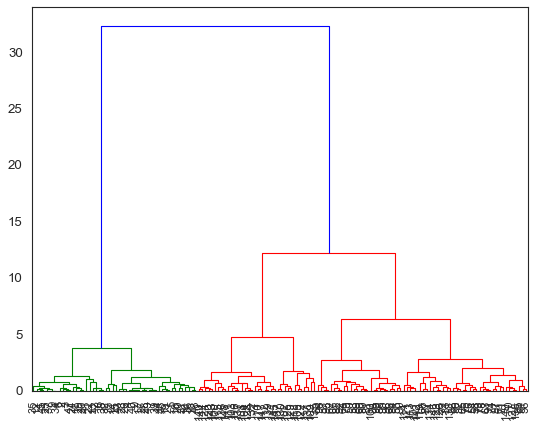

In [120]:
dendrogram(linkage(y = X, method = "ward"), leaf_font_size = 10);

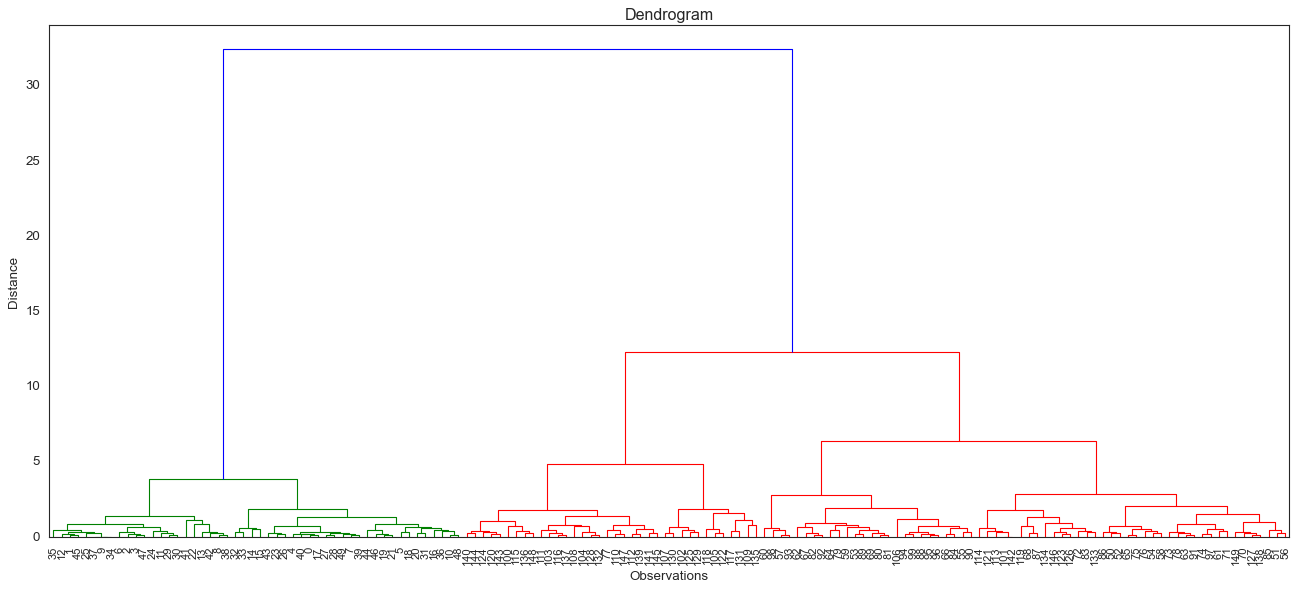

In [121]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

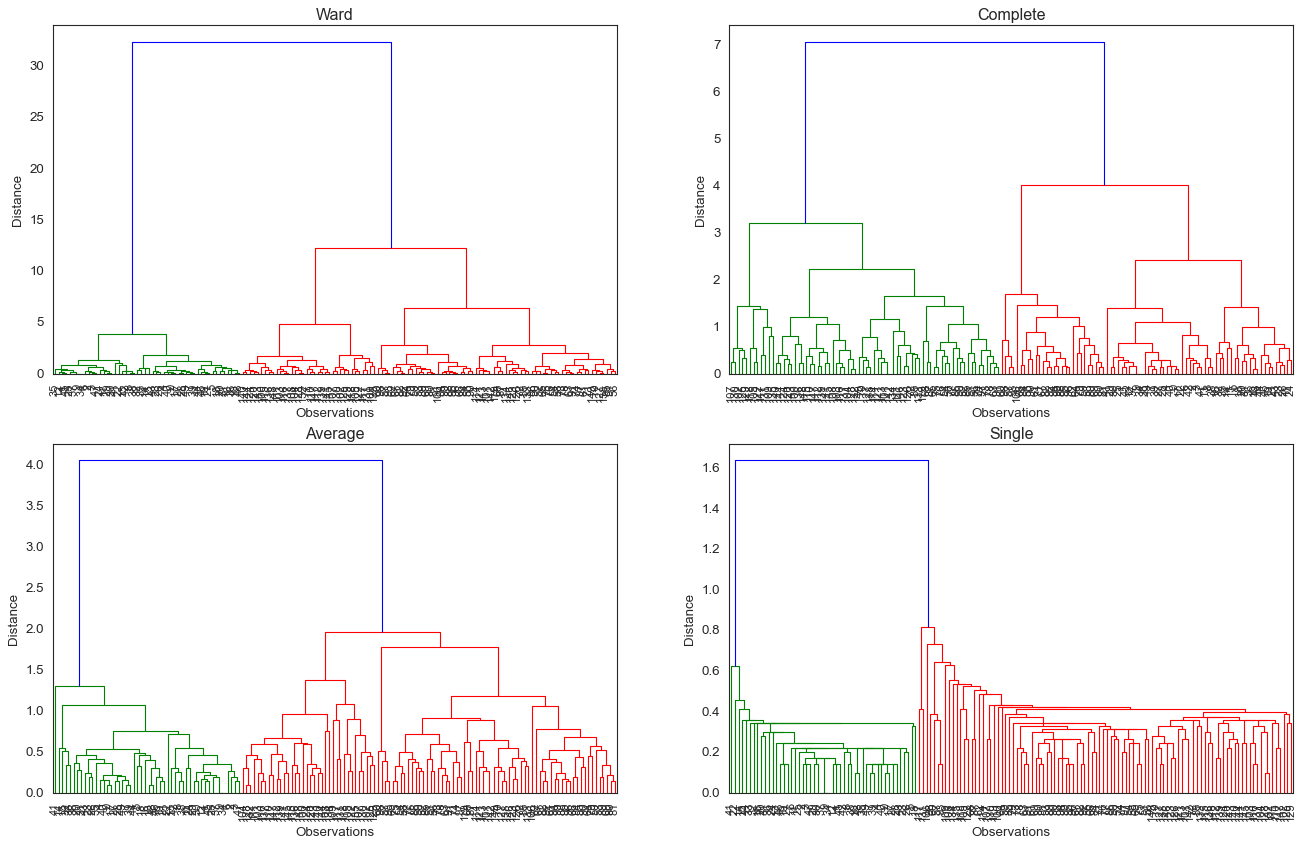

In [122]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [123]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.6863930543445408
Silhouette Score for 3 clusters: 0.5540972908150553
Silhouette Score for 4 clusters: 0.4887398491004218
Silhouette Score for 5 clusters: 0.4841553526240121
Silhouette Score for 6 clusters: 0.3618845152256815
Silhouette Score for 7 clusters: 0.34485408962742314
Silhouette Score for 8 clusters: 0.3462405312208591
Silhouette Score for 9 clusters: 0.33313850659637134


In [126]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [127]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

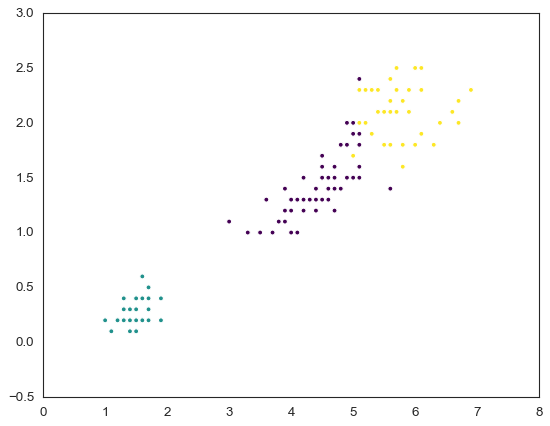

In [128]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = model1.labels_, cmap = "viridis")

In [129]:
clusters = model1.labels_

In [130]:
df["predicted_clusters"] = clusters

In [131]:
ct = pd.crosstab(df["predicted_clusters"], df["species"])
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [132]:
map_dict = {"virginica":2,
            "setosa":1,
            "versicolor": 0}

In [133]:
df["original_classes"]= df.species.map(map_dict)

In [134]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


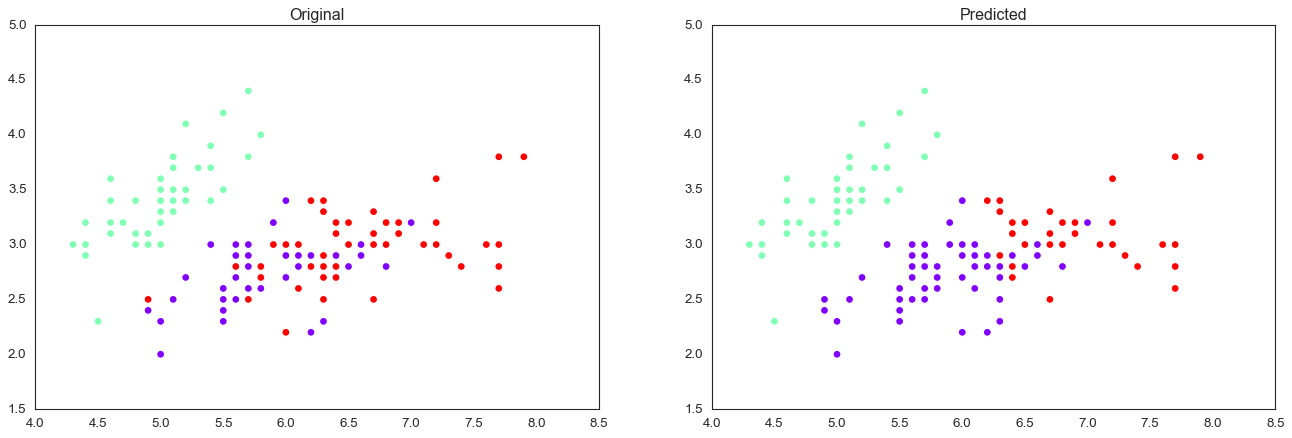

In [135]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow");

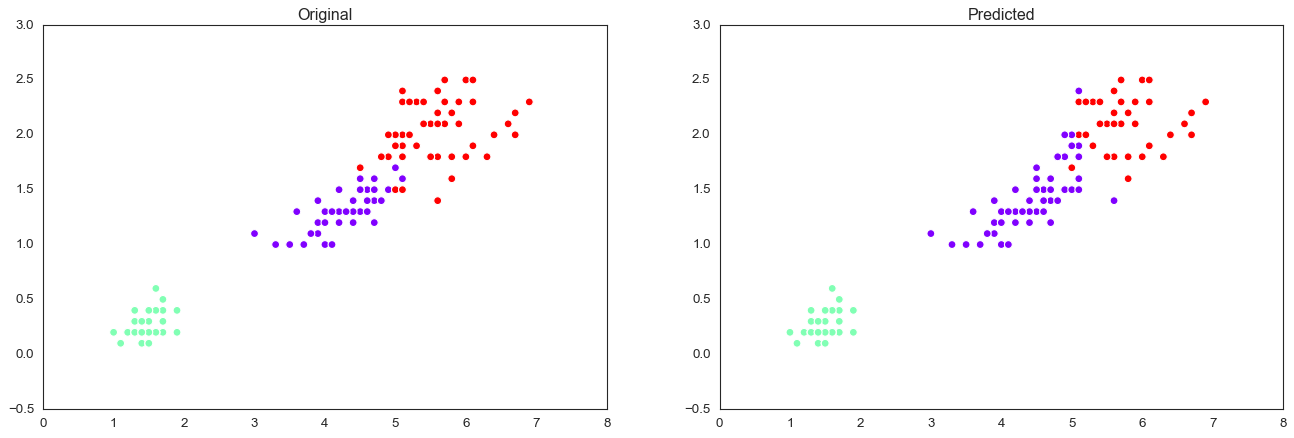

In [136]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df.iloc[:,2], df.iloc[:,3], c = df.predicted_clusters, s = 50, cmap = "rainbow");

### ARI - Adjusted Rand Index Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [137]:
from sklearn.metrics.cluster import adjusted_rand_score

In [138]:
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707746

In [139]:
adjusted_rand_score(df['original_classes'], df['predicted_clusters'])

0.7311985567707746

### Remodeling according to discriminating features

In [140]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [141]:
clus_pred = df.iloc[:, [0, 1, 2, 3, 5]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.920312,5.006,6.869444
sepal_width,2.751562,3.418,3.086111
petal_length,4.420312,1.464,5.769444
petal_width,1.434375,0.244,2.105556


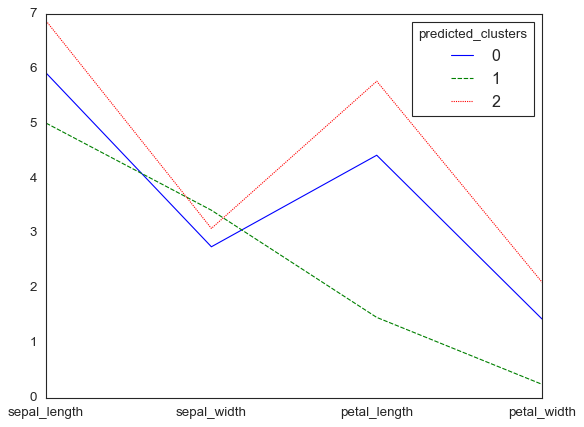

In [142]:
sns.lineplot(data = clus_pred);

In [143]:
Z = df.iloc[:, [2,3]]
Z

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Hopkins Test

In [144]:
hopkins(Z, Z.shape[0])

0.09671922677746074

### Dendrogram

In [145]:
hc_ward = linkage(y = Z, method = "ward")
hc_complete = linkage(Z, "complete")
hc_average = linkage(Z, "average")
hc_single = linkage(Z, "single")

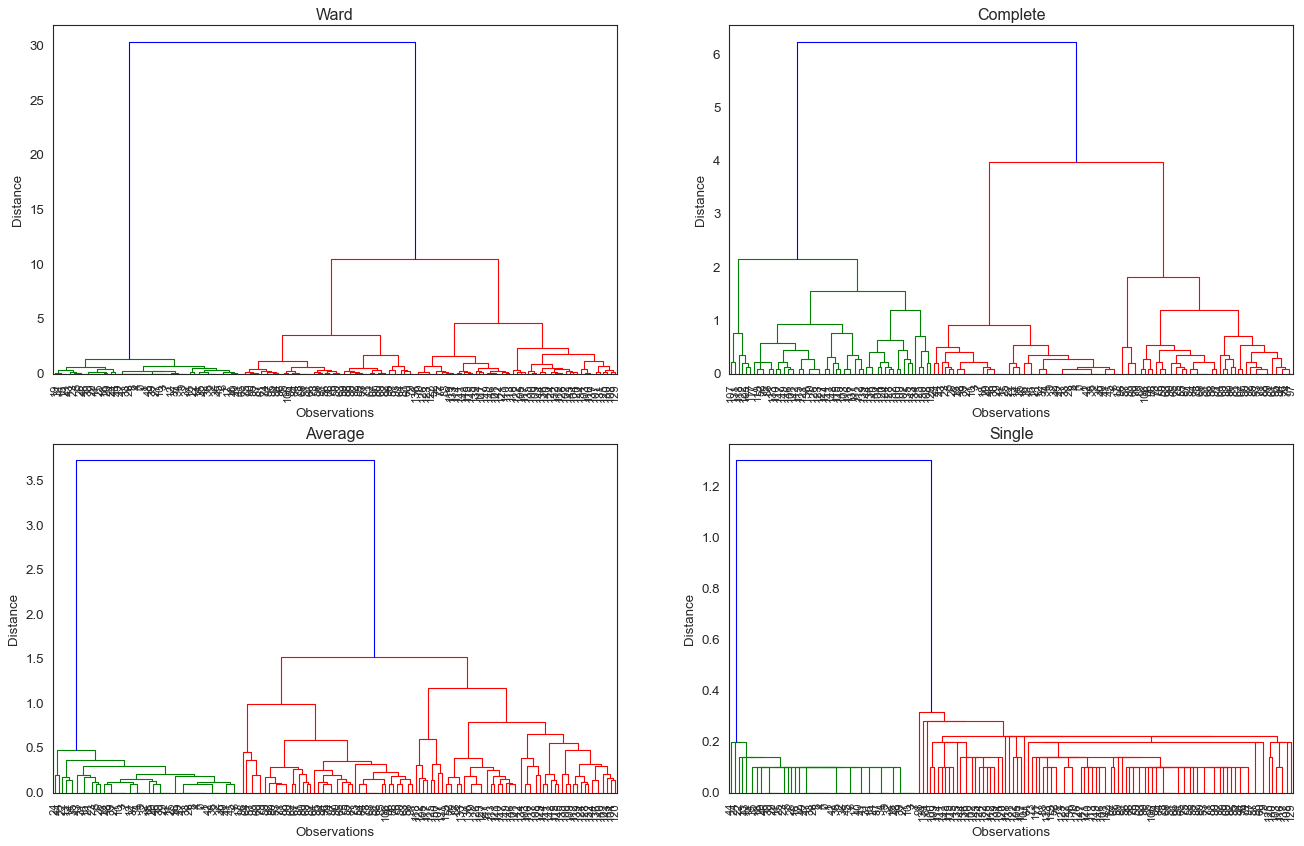

In [146]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### S(Silhouette) Score

In [147]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(Z)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(Z, model.labels_)}')

Silhouette Score for 2 clusters: 0.7667234280554557
Silhouette Score for 3 clusters: 0.6571856448729174
Silhouette Score for 4 clusters: 0.5893247167081789
Silhouette Score for 5 clusters: 0.57795322338552
Silhouette Score for 6 clusters: 0.5744995921566008
Silhouette Score for 7 clusters: 0.582843311312708
Silhouette Score for 8 clusters: 0.5676106719982476
Silhouette Score for 9 clusters: 0.5467111936909043


In [148]:
model2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model2.fit_predict(Z)

In [149]:
Z["species"] = df["species"]
Z["predicted_clusters"] = clusters
Z

,petal_length,petal_width,species,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1
...,...,...,...,...
145,5.2,2.3,virginica,0
146,5.0,1.9,virginica,0
147,5.2,2.0,virginica,0
148,5.4,2.3,virginica,0


In [150]:
Z_ct = pd.crosstab(Z["predicted_clusters"], Z["species"])
Z_ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [151]:
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [152]:
map_dict = {"virginica":0,
            "setosa":1,
            "versicolor": 2}

In [153]:
Z["original_classes"]= Z.species.map(map_dict)
Z

,petal_length,petal_width,species,predicted_clusters,original_classes
0,1.4,0.2,setosa,1,1
1,1.4,0.2,setosa,1,1
2,1.3,0.2,setosa,1,1
3,1.5,0.2,setosa,1,1
4,1.4,0.2,setosa,1,1
...,...,...,...,...,...
145,5.2,2.3,virginica,0,0
146,5.0,1.9,virginica,0,0
147,5.2,2.0,virginica,0,0
148,5.4,2.3,virginica,0,0


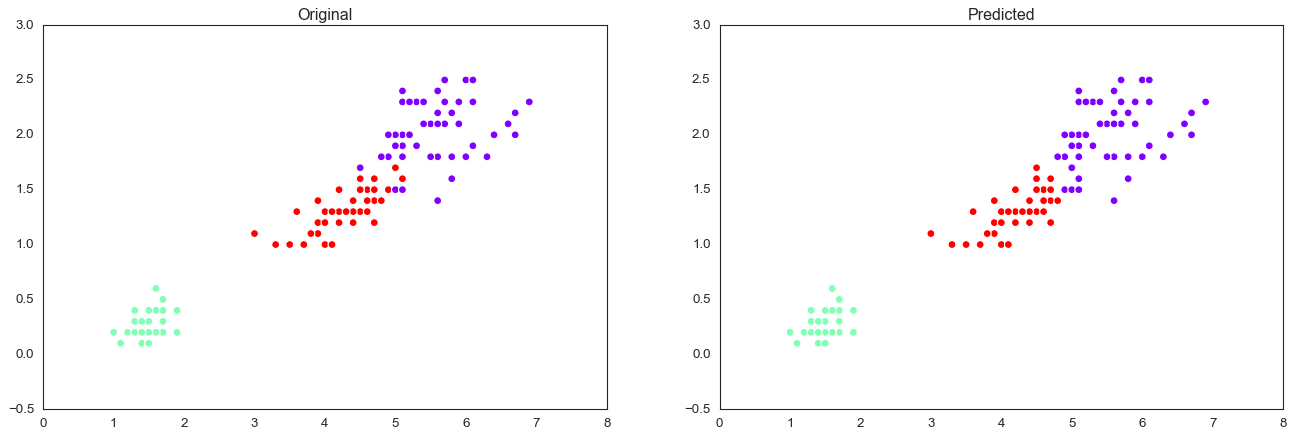

In [154]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.original_classes, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(Z.iloc[:,0], Z.iloc[:,1], c = Z.predicted_clusters, s = 50, cmap = "rainbow");

### ARI Score

In [155]:
adjusted_rand_score(Z['species'], Z['predicted_clusters'])

0.8857921001989628